In [1]:
!pip install -q tf_keras_vis

In [2]:
# Environment Setup: Choose between Colab and local environment
USE_COLAB = True

if USE_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    BASE_DIR = "/content/drive/MyDrive/Image_Classification"
else:
    BASE_DIR = "/path/to/local/folder"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Imports
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tf_keras_vis.scorecam import ScoreCAM
from tf_keras_vis.utils import normalize
import matplotlib.pyplot as plt


In [4]:
# Load Pretrained Model
model_path = f"{BASE_DIR}/example_model.keras"
model = keras.models.load_model(model_path)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 412ms/step


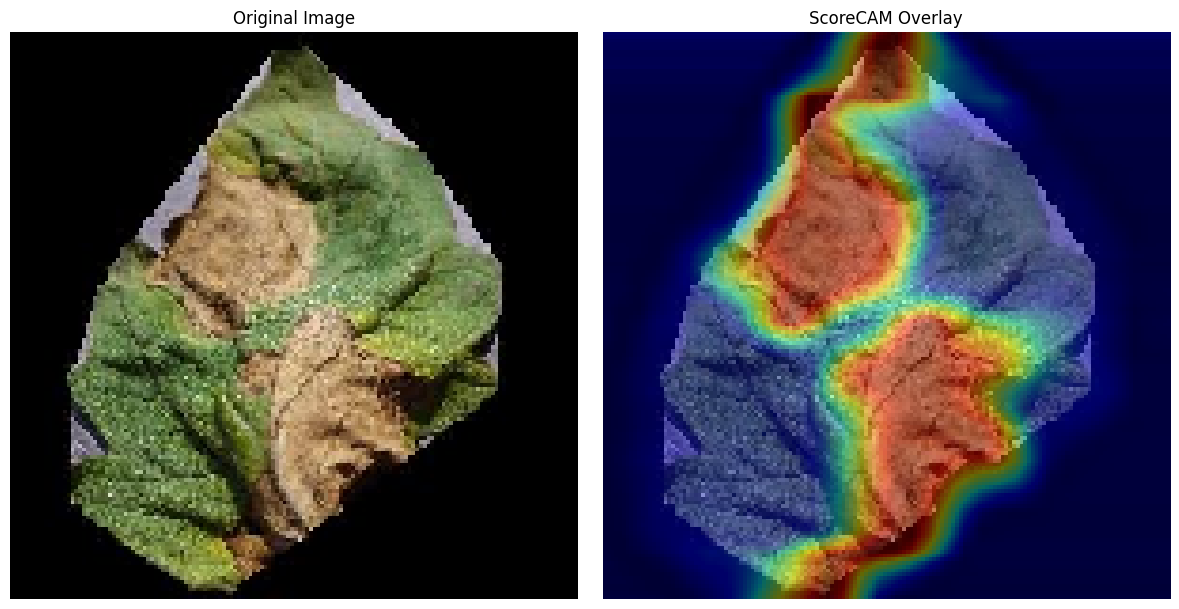

In [5]:
# Load Image
def load_image(path):
    img = load_img(path, target_size=(150, 150))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0
    return img

# Define Score Function for Class Activation
def score_function(output):
    return output[:, 0]  # Assuming class 0 is the target

# Setup ScoreCAM
gradcam_model = tf.keras.models.Model(inputs=model.inputs,
                                      outputs=model.layers[-1].output)
scorecam = ScoreCAM(model=gradcam_model)

# Load Test Image
image_path = f"{BASE_DIR}/unhealthy_425.jpg"
image = load_image(image_path)

# Generate Score-CAM Heatmap
heatmap = scorecam(score_function, image)[0]
heatmap = np.uint8(255 * normalize(heatmap))

# Overlay Heatmap on Original Image
colormap = plt.get_cmap('jet')
heatmap_rgb = colormap(heatmap)
heatmap_rgb = np.delete(heatmap_rgb, 3, axis=2)  # Remove alpha channel

original_image = image[0]
superimposed_img = heatmap_rgb * 0.4 + original_image * 0.6
superimposed_img /= superimposed_img.max()

# Display Result
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(superimposed_img)
plt.title('ScoreCAM Overlay')
plt.axis('off')

plt.tight_layout()
plt.show()